# Comparative Analysis
In this notebook, we compare ClaSS with competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys

sys.path.append("../../")

Let's choose a score for evaluation (F1 or Covering).

In [3]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [4]:
competitors = ["ADWIN", "HDDM", "BOCD", "NEWMA", "ChangeFinder", "DDM", "Window", "FLOSS", "ClaSS"]
dataset = "TSSB"
methods = list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv.gz"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/competitor_{dataset}/{file_name}",
                                     usecols=["dataset", eval_score], compression="gzip")

df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores

,dataset,ADWIN,HDDM,BOCD,NEWMA,ChangeFinder,DDM,Window,FLOSS,ClaSS
0,Adiac,0.303,0.303,0.433,0.303,0.303,0.415,0.303,0.445,0.706
1,ArrowHead,0.653,0.500,0.500,0.500,0.500,0.753,0.500,0.500,0.985
2,Beef,0.331,0.500,0.500,0.500,0.500,0.538,0.500,0.500,0.939
3,BeetleFly,0.901,0.500,0.476,0.500,0.903,0.668,0.500,0.500,0.682
4,BirdChicken,0.470,0.500,0.500,0.500,0.849,0.444,0.500,0.500,0.977
5,Car,0.256,0.256,0.543,0.256,0.256,0.610,0.256,0.256,0.889
6,CBF,0.342,0.342,0.503,0.342,0.342,0.530,0.342,0.949,0.969
7,ChlorineConcentration,0.577,0.577,0.589,0.577,0.578,0.614,0.577,0.577,0.577
8,CinCECGTorso,0.509,0.317,0.337,0.337,0.351,0.413,0.583,0.337,0.337
9,Coffee,0.639,0.500,0.506,0.500,0.500,0.472,0.500,0.500,0.996


Let's calculate the mean/median/std score.

In [5]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4113/3088260556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


ADWIN           0.391
HDDM            0.380
BOCD            0.464
NEWMA           0.401
ChangeFinder    0.436
DDM             0.523
Window          0.485
FLOSS           0.484
ClaSS           0.807
dtype: float64

In [6]:
df_scores.median(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4113/803467923.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.median(axis=0).round(3)


ADWIN           0.342
HDDM            0.333
BOCD            0.448
NEWMA           0.342
ChangeFinder    0.365
DDM             0.499
Window          0.473
FLOSS           0.500
ClaSS           0.887
dtype: float64

In [7]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4113/2527189798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


ADWIN           0.212
HDDM            0.211
BOCD            0.207
NEWMA           0.229
ChangeFinder    0.247
DDM             0.180
Window          0.224
FLOSS           0.227
ClaSS           0.194
dtype: float64

Let's compute the wins per method.

In [8]:
ranks = df_scores.rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [9]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

ADWIN:wins=4 rank=4.50667
HDDM:wins=5 rank=4.42667
BOCD:wins=7 rank=4.12
NEWMA:wins=7 rank=4.13333
ChangeFinder:wins=8 rank=4.09333
DDM:wins=6 rank=3.89333
Window:wins=10 rank=3.33333
FLOSS:wins=7 rank=3.46667
ClaSS:wins=58 rank=1.49333


Let's plot and output the ranks.

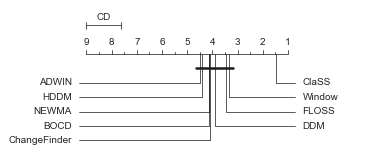

In [10]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=5, textspace=1.1,
                                      filename=f"../../figures/cd_comparative_{dataset}.pdf")  #

Let's compute wins/losses against ClaSS.

In [11]:
selection = "ClaSS"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs ADWIN: (wins/ties/losses): 60/12/3
ClaSS vs HDDM: (wins/ties/losses): 60/15/0
ClaSS vs BOCD: (wins/ties/losses): 60/7/8
ClaSS vs NEWMA: (wins/ties/losses): 56/19/0
ClaSS vs ChangeFinder: (wins/ties/losses): 58/10/7
ClaSS vs DDM: (wins/ties/losses): 64/0/11
ClaSS vs Window: (wins/ties/losses): 57/12/6
ClaSS vs FLOSS: (wins/ties/losses): 56/17/2


/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4113/3898032719.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4113/3898032719.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


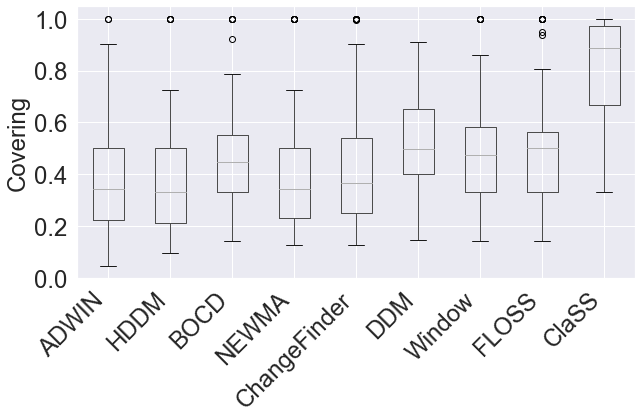

In [12]:
fontsize = 24
_, ax = plt.subplots(figsize=(10, 5))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_xticklabels(df_scores.columns[1:], rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0 + .2, .2), 1))

plt.savefig(f"../../figures/bp_comparative_{dataset}.pdf", bbox_inches="tight")